In [1]:
import numpy as np
import tifffile as tiff
from PARC import parc
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import umap
from sklearn.decomposition import PCA
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from collections import defaultdict
from sklearn.manifold import TSNE
import scanpy as sc
import scanorama
import anndata as an
import scipy

In [2]:
name = ['Hoechst', '5hmc', '5mc', 'Collagen 1', 'Fibronectin', 'aSMA', 'Pan Cyto', 'Calponin', 'VCAM 1']
sample = ['1L', '7L', '11L', '17L']
ROI = ['R1', 'R2', 'R3', 'R4']
n = 15

In [ ]:
def Pixel(sample, ROI, name, n):

    image = tiff.imread('data/Pixel 2/Dataset/' + sample + '/' + ROI + '/' + sample + ' ' + name + '.tif')

    mask = tiff.imread('data/Pixel 2/Dataset/' + sample + '/' + ROI + '/' + sample + ' ' + name + '_Probabilities_0.tiff')

    # Ensure mask is binary (0 and 1)
    mask = (mask > 0.3).astype(np.uint8)  # Converts to boolean mask

    # Overlay the mask (red overlay)
    overlay = np.dstack([image, image, image])  # Convert grayscale to RGB
    overlay[..., 0] = np.where(mask == 1, 255, overlay[..., 0])  # Red channel

    overlapping_intensities = image * mask

    matrix = overlapping_intensities

    # Compute the new dimensions rounded up to the nearest multiple of 3
    new_rows = int(np.ceil(matrix.shape[0] / n) * n)
    new_cols = int(np.ceil(matrix.shape[1] / n) * n)

    # Pad the matrix with the edge values to match the new size
    padded_matrix = np.pad(matrix, 
                            ((0, new_rows - matrix.shape[0]), (0, new_cols - matrix.shape[1])), 
                            mode='edge')

    # Reshape into 3x3 patches
    patches = padded_matrix.reshape(new_rows // n, n, new_cols // n, n)

    # Compute the mean over the 3x3 patches
    averaged_matrix = patches.mean(axis=(1, 3))

    # pd.DataFrame(averaged_matrix)

    # column_vector = [item for sublist in overlapping_intensities for item in sublist]
    column_vector = averaged_matrix.reshape(-1,1)
    # print(len(column_vector))
    
    flatten = pd.DataFrame(column_vector, columns = [name])
    return flatten


In [4]:
WT_R1 = pd.DataFrame()
for k in range(len(name)):
    WT_R1 = pd.concat([WT_R1, Pixel(sample[0], ROI[0], name[k], n)], axis=1)

WT_R2 = pd.DataFrame()
for k in range(len(name)):
    WT_R2 = pd.concat([WT_R2, Pixel(sample[0], ROI[1], name[k], n)], axis=1)

WT_R3 = pd.DataFrame()
for k in range(len(name)):
    WT_R3 = pd.concat([WT_R3, Pixel(sample[0], ROI[2], name[k], n)], axis=1)

WT_R4 = pd.DataFrame()
for k in range(len(name)):
    WT_R4 = pd.concat([WT_R4, Pixel(sample[0], ROI[3], name[k], n)], axis=1)

WTHF_R1 = pd.DataFrame()
for k in range(len(name)):
    WTHF_R1 = pd.concat([WTHF_R1, Pixel(sample[1], ROI[0], name[k], n)], axis=1)

WTHF_R2 = pd.DataFrame()
for k in range(len(name)):
    WTHF_R2 = pd.concat([WTHF_R2, Pixel(sample[1], ROI[1], name[k], n)], axis=1)

WTHF_R3 = pd.DataFrame()
for k in range(len(name)):
    WTHF_R3 = pd.concat([WTHF_R3, Pixel(sample[1], ROI[2], name[k], n)], axis=1)

FB_R1 = pd.DataFrame()
for k in range(len(name)):
    FB_R1 = pd.concat([FB_R1, Pixel(sample[2], ROI[0], name[k], n)], axis=1)

FB_R2 = pd.DataFrame()
for k in range(len(name)):
    FB_R2 = pd.concat([FB_R2, Pixel(sample[2], ROI[1], name[k], n)], axis=1)

FB_R3 = pd.DataFrame()
for k in range(len(name)):
    FB_R3 = pd.concat([FB_R3, Pixel(sample[2], ROI[2], name[k], n)], axis=1)

FB_R4 = pd.DataFrame()
for k in range(len(name)):
    FB_R4 = pd.concat([FB_R4, Pixel(sample[2], ROI[3], name[k], n)], axis=1)

FBHF_R1 = pd.DataFrame()
for k in range(len(name)):
    FBHF_R1 = pd.concat([FBHF_R1, Pixel(sample[3], ROI[0], name[k], n)], axis=1)

FBHF_R2 = pd.DataFrame()
for k in range(len(name)):
    FBHF_R2 = pd.concat([FBHF_R2, Pixel(sample[3], ROI[1], name[k], n)], axis=1)

FBHF_R3 = pd.DataFrame()
for k in range(len(name)):
    FBHF_R3 = pd.concat([FBHF_R3, Pixel(sample[3], ROI[2], name[k], n)], axis=1)

FBHF_R4 = pd.DataFrame()
for k in range(len(name)):
    FBHF_R4 = pd.concat([FBHF_R4, Pixel(sample[3], ROI[3], name[k], n)], axis=1)

for i in range(len(sample)):
    if sample[i] == '1L':
        DS = pd.DataFrame()
        for j in range(len(ROI)):
            oneROI = pd.DataFrame()
            for k in range(len(name)):
                oneROI = pd.concat([oneROI, Pixel(sample[i], ROI[j], name[k], n)], axis=1)
            pixelDS1 = pd.concat([DS, oneROI])
            DS = pixelDS1
    if sample[i] == '7L':
        DS = pd.DataFrame()
        for j in range(len(ROI)-1):
            oneROI = pd.DataFrame()
            for k in range(len(name)):
                oneROI = pd.concat([oneROI, Pixel(sample[i], ROI[j], name[k], n)], axis=1)
            pixelDS2 = pd.concat([DS, oneROI])
            DS = pixelDS2
    if sample[i] == '11L':
        DS = pd.DataFrame()
        for j in range(len(ROI)):
            oneROI = pd.DataFrame()
            for k in range(len(name)):
                oneROI = pd.concat([oneROI, Pixel(sample[i], ROI[j], name[k], n)], axis=1)
            pixelDS3 = pd.concat([DS, oneROI])
            DS = pixelDS3
    if sample[i] == '17L':
        DS = pd.DataFrame()
        for j in range(len(ROI)):
            oneROI = pd.DataFrame()
            for k in range(len(name)):
                oneROI = pd.concat([oneROI, Pixel(sample[i], ROI[j], name[k], n)], axis=1)
            pixelDS4 = pd.concat([DS, oneROI])
            DS = pixelDS4

In [5]:
print(pixelDS1.shape)
print(pixelDS2.shape)
print(pixelDS3.shape)
print(pixelDS4.shape)

(121211, 9)
(50275, 9)
(82604, 9)
(118306, 9)


In [6]:
pixelDS1_sampled = pixelDS1.sample(n=20000, axis=0)
pixelDS2_sampled = pixelDS2.sample(n=20000, axis=0)
pixelDS3_sampled = pixelDS3.sample(n=20000, axis=0)
pixelDS4_sampled = pixelDS4.sample(n=20000, axis=0)

In [7]:
adata1 = sc.AnnData(pixelDS1_sampled)
adata2 = sc.AnnData(pixelDS2_sampled)
adata3 = sc.AnnData(pixelDS3_sampled)
adata4 = sc.AnnData(pixelDS4_sampled)
adatas = [adata1, adata2, adata3, adata4]
adatas_cor = scanorama.correct_scanpy(adatas, return_dimred=True)
adata_spatial = sc.concat(
    adatas_cor,
    label="library_id",
    uns_merge="unique",
    index_unique="-",
)


Found 9 genes among all datasets


/Users/helen/anaconda3/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/helen/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/helen/anaconda3/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/helen/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/helen/anaconda3/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str

[[0.      0.32655 0.398   0.22705]
 [0.      0.      0.60785 0.75935]
 [0.      0.      0.      0.785  ]
 [0.      0.      0.      0.     ]]
Processing datasets (2, 3)
Processing datasets (1, 3)
Processing datasets (1, 2)
Processing datasets (0, 2)
Processing datasets (0, 1)
Processing datasets (0, 3)


/Users/helen/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


/Users/helen/anaconda3/lib/python3.11/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


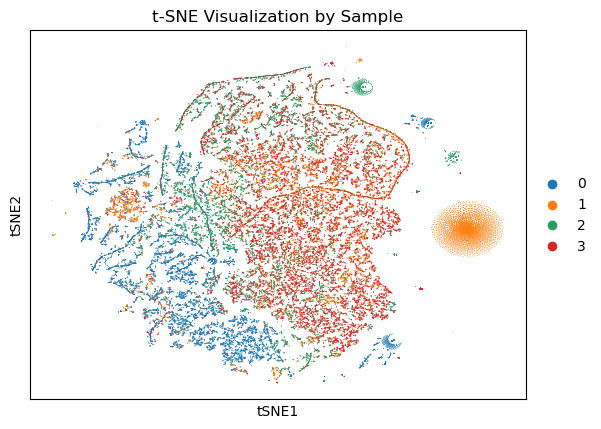

In [8]:
sc.pp.neighbors(adata_spatial, use_rep="X_scanorama")

if scipy.sparse.issparse(adata_spatial.obsm["X_scanorama"]):
    X_scanorama = adata_spatial.obsm["X_scanorama"].toarray()
else:
    X_scanorama = adata_spatial.obsm["X_scanorama"]

tsne = TSNE(
    n_components=2,  # 2D t-SNE
    perplexity=30,   # Default perplexity
    init="random",   # Use random initialization
    random_state=42, # For reproducibility
    n_jobs=-1,       # Use all CPU cores
)
X_tsne = tsne.fit_transform(X_scanorama)

# Add the t-SNE embedding to the AnnData object
adata_spatial.obsm["X_tsne"] = X_tsne

# Plot t-SNE with 'library_id' as the color
sc.pl.embedding(
    adata_spatial,
    basis="tsne",  # Use the t-SNE embedding
    color="library_id",  # Color by library/sample ID
    palette=sc.pl.palettes.default_20,  # Use a default color palette
    title="t-SNE Visualization by Sample",  # Add a title
)

/Users/helen/anaconda3/lib/python3.11/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


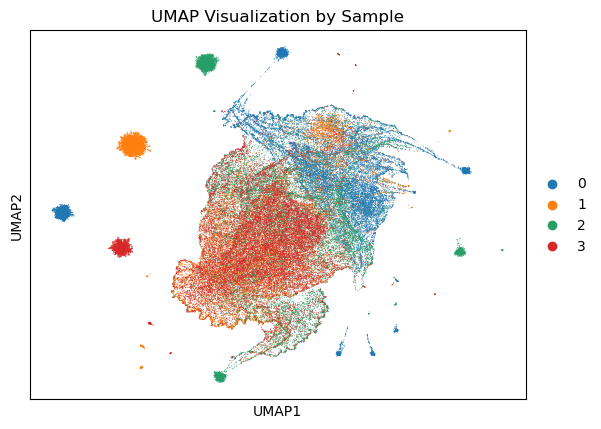

In [9]:
sc.pp.neighbors(adata_spatial, use_rep="X_scanorama")
sc.tl.umap(adata_spatial)
sc.pl.umap(
    adata_spatial, color=["library_id"], palette=sc.pl.palettes.default_20, title="UMAP Visualization by Sample"
)